In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
#cargando los datos de datast mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
#shaoe of the numpy arays
print((X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


In [ ]:
#Datos de entrenamiento=60000 imagenes
#Datos de prueba=10000 imagenes
#dimension de las imagenes 28x28
#Con un canal que significa que la imagene es a blanco y negro


In [ ]:
#imprimiendo la decima imagen
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

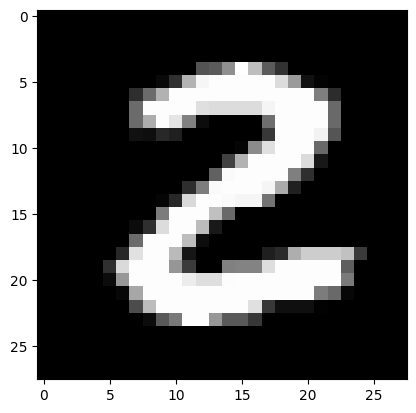

2


In [ ]:
#mostrando la imagen
plt.imshow(X_train[25], cmap='gray')
plt.show()

#print the corresponding label

print(Y_train[25])


In [ ]:
#Image labels

In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


Podemos usar estas etiquetas como tal o tambien podemos aplicar un encoding


In [ ]:
#all the images have the same dimensions in this dataset, if not, we have to resize all the images to a common dimension

In [ ]:
#escalando los valores
X_train=X_train/255
X_test=X_test/255


In [ ]:
print(X_train[10])

0 --> Negro
1-- > Blanco

Contruimos la red neuronal

In [ ]:
# Configuramos primero las capas de la red neurinal
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')  #esta es la salida y tiene 10 neuronas
    # ya que se tienen 10 clases en el conjunto de datos
])

In [ ]:
#compilando el modelo
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#entrenando la red neuronal
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2922 - accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1333 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0978 - accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0807 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0671 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0565 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0492 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0435 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0398 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

Training data accuracy is 98.88%


In [ ]:
#Accuracy on test data
loss,accuracy=model.evaluate(X_test,Y_test)
print(f"Lost of test data is, {loss} , and the accuracy es {accuracy}")

313/313 [==============================] - 2s 6ms/step - loss: 0.1026 - accuracy: 0.9707
Lost of test data is, 0.10257270187139511 , and the accuracy es 0.9707000255584717


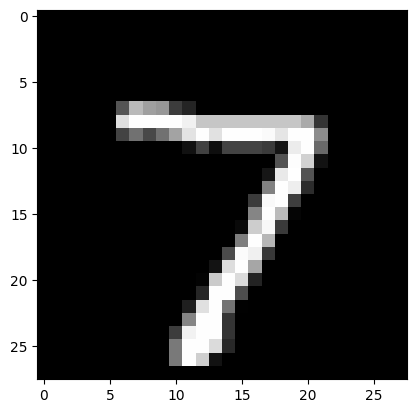

In [ ]:
#first data point in X_test
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [ ]:
print(Y_test[0])

7


In [34]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [36]:
print(y_pred[0])

[7.1301719e-04 4.9515610e-04 6.6903070e-02 9.8845530e-01 5.0346502e-05
 1.7538685e-02 6.7270044e-11 9.9998510e-01 4.5326474e-01 1.4378600e-01]


model.predict gives the prediction probailty of each class for that fata point

In [37]:
#converting the prediction probabilities to class label
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [38]:
#Lo hacemos ahora con todos los puntos
y_pred_labels=[np.argmax(i) for i in y_pred]

In [40]:
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels

y_pred_labels --> Predicted labels

In [44]:
#Matriz de confusion
conf_mat=confusion_matrix(Y_test,y_pred_labels)

In [46]:
print(conf_mat)

tf.Tensor(
[[ 961    0    0    2    1    6    3    1    4    2]
 [   0 1118    3    1    0    2    2    1    7    1]
 [   2    1  992    9    4    2    3    5   13    1]
 [   0    0    3  977    1   13    0    3    8    5]
 [   0    1    2    0  960    3    6    0    0   10]
 [   1    0    0    8    1  874    4    0    3    1]
 [   3    1    3    0    4   13  927    1    6    0]
 [   0    4   11    3    2    0    0  982   12   14]
 [   0    0    1    5    3    8    0    1  954    2]
 [   0    2    0    5   17    8    2    2   10  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

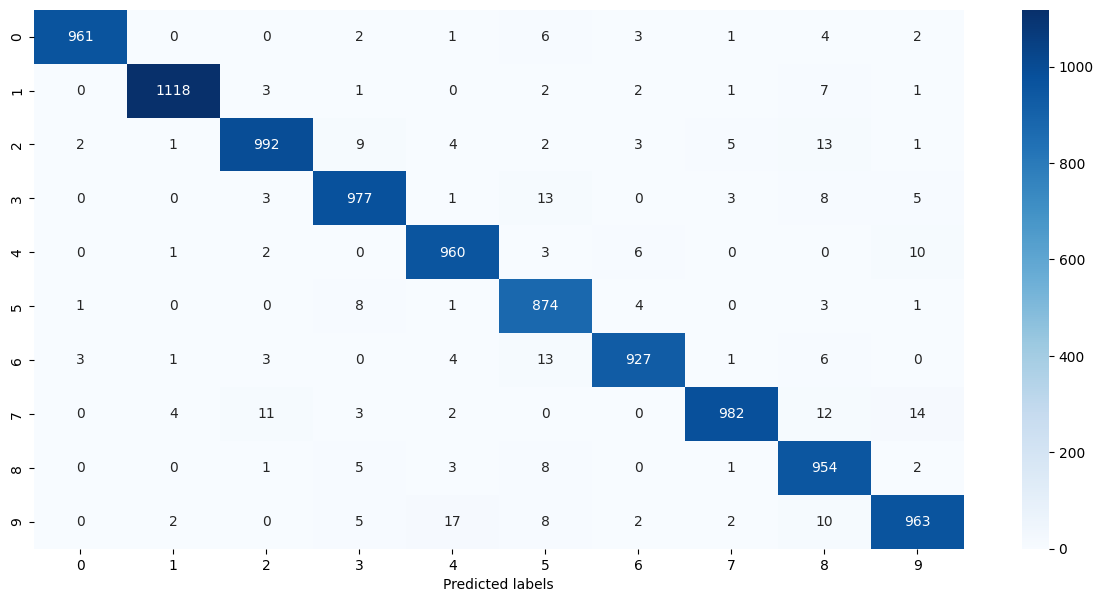

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True ,fmt='d', cmap='Blues')
plt.ylabel=('True labels')
plt.xlabel('Predicted labels')


In [1]:
#construyendo un sistema predictivo
input_image_path='/content/5.jpeg'
input_image=cv2.imread(input_image_path)
input_image.shape

NameError: name 'cv2' is not defined

In [54]:
input_image=255-input_image

array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)
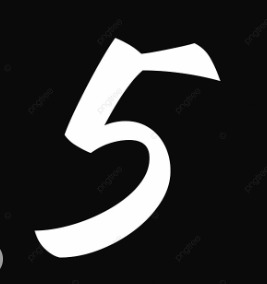

In [56]:
input_image

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)
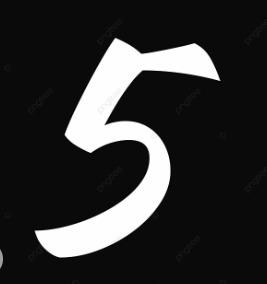

In [60]:
escala_de_grises=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
escala_de_grises

In [62]:
input_image=cv2.resize(escala_de_grises,(28,28))

In [64]:
input_image.shape

(28, 28)

In [69]:
cv2_imshow(input_image)

In [70]:
input_image_resize=input_image/255

In [73]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])
image_reshaped.shape

(1, 28, 28)

In [77]:
prediccion=model.predict(image_reshaped).argmax()
print("El numero es : {} ".format(prediccion))

1/1 [==============================] - 0s 17ms/step
El numero es : 5 
